In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel('Land prices of Colombo district-Sri Lanka.xlsx')

In [3]:
df.head(5)

,Address_ID,Address,Land_size(Perches),Price_Scale,Land_type,Posted_Date_new,Distance from fort,count_govtschools_A,min_dist_govtschools_a,count_govtschools_B,...,min_dist_nearest_Pvt_Hospital,count_Pvt_Hospital,min_dist_nearest_Pvt_Med_center,count_Pvt_Med_Centers,min_dist_nearest_Supermarket,count_Supermarkets_within2km,min_dist_nearest_Fuel_station,count_Fuel_Stations_within2km,Mentioned Price(Rs),Price per Perch
0,6,battaramulla,12.00,per perch,"Commercial, Residential",2021-09-21,11.349555,0,3.099786,3,...,2.966136,0,0.184196,2,0.275528,11,1.185148,2,3800000,3800000.0
1,12,nawala,22.00,per perch,"Commercial, Residential",2021-09-21,9.160830,2,1.530830,12,...,0.885503,5,2.102498,0,0.229320,17,1.221396,4,6500000,6500000.0
2,16,mount lavinia,23.00,per perch,Residential,2021-09-21,12.887396,0,2.727171,5,...,4.077519,0,1.188858,2,0.113300,20,1.052876,5,2600000,2600000.0
3,126,divulpitiya,16.05,per perch,"Commercial, Residential",2021-09-21,12.597925,0,2.631805,2,...,4.266219,0,0.585909,1,0.315818,19,0.523224,3,3700000,3700000.0
4,53,kollupitiya,6.80,per perch,Residential,2021-09-21,4.222136,3,0.838323,8,...,0.744991,4,1.394043,2,0.234181,17,0.836103,4,85000000,85000000.0


In [4]:
df.isnull().sum()

Address_ID                           0
Address                              0
Land_size(Perches)                   0
Price_Scale                          0
Land_type                            0
Posted_Date_new                      0
Distance from fort                   0
count_govtschools_A                  0
min_dist_govtschools_a               0
count_govtschools_B                  0
min_dist_govtschools_b               0
count_semigovtschools                0
min_dist_semigovtschools             0
count_intlschools                    0
min_dist_intlschools                 0
count_uni                            0
min_dist_uni                         0
min_dist_nearest_express             0
min_dist_nearest_railway             0
min_dist_nearest_bank                0
count_banks_within_2km               0
min_dist_nearest_FinanceCompany      0
count_FinanceCompanies_within_2km    0
min_dist_nearest_Govt_Hospital       0
count_Govt_Hospitals                 0
min_dist_nearest_Pvt_Hosp

In [5]:
df.Address.nunique()

160

In [6]:
address_count=df.Address.value_counts()
address_count

Address
ranala           350
makandana        270
kaduwela         250
kesbewa          206
piliyandala      204
                ... 
rukmale            1
batawala           1
jambugasmulla      1
moratumulla        1
malapalla          1
Name: count, Length: 160, dtype: int64

In [7]:
address_count[address_count>10]

Address
ranala             350
makandana          270
kaduwela           250
kesbewa            206
piliyandala        204
                  ... 
madiwela            12
kalapaluwawa        11
thalapathpitiya     11
maradana            11
udahamulla          11
Name: count, Length: 71, dtype: int64

In [8]:
address_less_10=address_count[address_count<10]
address_less_10

Address
wellampitiya     9
koswatta         9
rattanapitiya    9
pinnawala        8
godagama         8
                ..
rukmale          1
batawala         1
jambugasmulla    1
moratumulla      1
malapalla        1
Name: count, Length: 87, dtype: int64

In [9]:
def label_address(address):
    if address in address_less_10:
        return 'Other'
    else:
        return address

In [10]:
df1=df.copy()
df1['Address']=df1['Address'].apply(label_address)

In [11]:
df1['Address'].nunique()

74

In [12]:
df.Land_type.unique()

array(['Commercial, Residential', 'Residential',
       'Commercial, Residential, Other', 'Commercial',
       'Residential, Other',
       'Agricultural, Commercial, Residential, Other', 'Other',
       'Agricultural, Commercial, Residential', 'Commercial, Other',
       'Agricultural, Residential, Other', 'Agricultural, Residential',
       'Agricultural, Commercial', 'Agricultural',
       'Agricultural, Commercial, Other'], dtype=object)

In [13]:
df1['Posted_Date_new'].unique()

<DatetimeArray>
['2021-09-21 00:00:00', '2021-09-20 00:00:00', '2021-09-19 00:00:00',
 '2021-09-18 00:00:00', '2021-09-17 00:00:00', '2021-09-16 00:00:00',
 '2021-09-15 00:00:00', '2021-09-14 00:00:00', '2021-09-13 00:00:00',
 '2021-09-12 00:00:00', '2021-09-11 00:00:00', '2021-09-10 00:00:00',
 '2021-09-09 00:00:00', '2021-09-08 00:00:00', '2021-09-07 00:00:00',
 '2021-09-06 00:00:00', '2021-09-05 00:00:00', '2021-09-04 00:00:00',
 '2021-09-03 00:00:00', '2021-09-02 00:00:00', '2021-09-01 00:00:00',
 '2021-08-31 00:00:00', '2021-08-30 00:00:00', '2021-08-29 00:00:00',
 '2021-08-28 00:00:00', '2021-08-27 00:00:00', '2021-08-26 00:00:00',
 '2021-08-25 00:00:00', '2021-08-24 00:00:00', '2021-08-23 00:00:00',
 '2021-08-22 00:00:00', '2021-08-21 00:00:00', '2021-08-20 00:00:00',
 '2021-08-19 00:00:00', '2021-08-18 00:00:00', '2021-08-17 00:00:00',
 '2021-08-16 00:00:00', '2021-08-15 00:00:00', '2021-08-14 00:00:00',
 '2021-08-13 00:00:00', '2021-08-12 00:00:00', '2021-08-11 00:00:00',
 '20

In [14]:
df2=df1.drop(['Posted_Date_new','Address_ID'],axis='columns')

In [15]:
df2.head()

,Address,Land_size(Perches),Price_Scale,Land_type,Distance from fort,count_govtschools_A,min_dist_govtschools_a,count_govtschools_B,min_dist_govtschools_b,count_semigovtschools,...,min_dist_nearest_Pvt_Hospital,count_Pvt_Hospital,min_dist_nearest_Pvt_Med_center,count_Pvt_Med_Centers,min_dist_nearest_Supermarket,count_Supermarkets_within2km,min_dist_nearest_Fuel_station,count_Fuel_Stations_within2km,Mentioned Price(Rs),Price per Perch
0,battaramulla,12.00,per perch,"Commercial, Residential",11.349555,0,3.099786,3,0.190254,0,...,2.966136,0,0.184196,2,0.275528,11,1.185148,2,3800000,3800000.0
1,nawala,22.00,per perch,"Commercial, Residential",9.160830,2,1.530830,12,0.863357,1,...,0.885503,5,2.102498,0,0.229320,17,1.221396,4,6500000,6500000.0
2,mount lavinia,23.00,per perch,Residential,12.887396,0,2.727171,5,0.191582,2,...,4.077519,0,1.188858,2,0.113300,20,1.052876,5,2600000,2600000.0
3,Other,16.05,per perch,"Commercial, Residential",12.597925,0,2.631805,2,1.238951,2,...,4.266219,0,0.585909,1,0.315818,19,0.523224,3,3700000,3700000.0
4,kollupitiya,6.80,per perch,Residential,4.222136,3,0.838323,8,0.113577,9,...,0.744991,4,1.394043,2,0.234181,17,0.836103,4,85000000,85000000.0


In [16]:
df2.Price_Scale.unique()

array(['per perch', 'total price', 'per acre'], dtype=object)

In [17]:
df2[df2.Price_Scale=='total price'].shape

(923, 33)

In [18]:
df2[df2.Price_Scale=='per acre'].shape

(3, 33)

In [19]:
df2[df2.Price_Scale=='per perch'].shape

(3568, 33)

In [20]:
df2[df2.Price_Scale=='total price'].head(3)

,Address,Land_size(Perches),Price_Scale,Land_type,Distance from fort,count_govtschools_A,min_dist_govtschools_a,count_govtschools_B,min_dist_govtschools_b,count_semigovtschools,...,min_dist_nearest_Pvt_Hospital,count_Pvt_Hospital,min_dist_nearest_Pvt_Med_center,count_Pvt_Med_Centers,min_dist_nearest_Supermarket,count_Supermarkets_within2km,min_dist_nearest_Fuel_station,count_Fuel_Stations_within2km,Mentioned Price(Rs),Price per Perch
7,hokandara,11.00,total price,Residential,16.392644,0,4.673446,1,0.386004,0,...,2.968547,0,4.563302,0,1.187704,5,0.074059,1,1200000,1.090909e+05
9,Other,8.00,total price,Residential,19.716454,0,9.373586,1,0.751005,0,...,8.497998,0,3.181837,0,2.126975,0,2.345782,0,3200000,4.000000e+05
11,nawala,6.75,total price,Residential,9.160830,2,1.530830,12,0.863357,1,...,0.885503,5,2.102498,0,0.229320,17,1.221396,4,35000000,5.185185e+06


In [21]:
df2[df2.Price_Scale=='per perch'].head()

,Address,Land_size(Perches),Price_Scale,Land_type,Distance from fort,count_govtschools_A,min_dist_govtschools_a,count_govtschools_B,min_dist_govtschools_b,count_semigovtschools,...,min_dist_nearest_Pvt_Hospital,count_Pvt_Hospital,min_dist_nearest_Pvt_Med_center,count_Pvt_Med_Centers,min_dist_nearest_Supermarket,count_Supermarkets_within2km,min_dist_nearest_Fuel_station,count_Fuel_Stations_within2km,Mentioned Price(Rs),Price per Perch
0,battaramulla,12.00,per perch,"Commercial, Residential",11.349555,0,3.099786,3,0.190254,0,...,2.966136,0,0.184196,2,0.275528,11,1.185148,2,3800000,3800000.0
1,nawala,22.00,per perch,"Commercial, Residential",9.160830,2,1.530830,12,0.863357,1,...,0.885503,5,2.102498,0,0.229320,17,1.221396,4,6500000,6500000.0
2,mount lavinia,23.00,per perch,Residential,12.887396,0,2.727171,5,0.191582,2,...,4.077519,0,1.188858,2,0.113300,20,1.052876,5,2600000,2600000.0
3,Other,16.05,per perch,"Commercial, Residential",12.597925,0,2.631805,2,1.238951,2,...,4.266219,0,0.585909,1,0.315818,19,0.523224,3,3700000,3700000.0
4,kollupitiya,6.80,per perch,Residential,4.222136,3,0.838323,8,0.113577,9,...,0.744991,4,1.394043,2,0.234181,17,0.836103,4,85000000,85000000.0


In [22]:
df3=df2.copy()

In [23]:
df3['Mentioned Price(Rs)']=df3.apply(lambda row:row['Mentioned Price(Rs)']/row['Land_size(Perches)']
                                    if row['Price_Scale']=='total price'
                                    else row['Mentioned Price(Rs)'],axis=1)

In [24]:
df2[df2.Price_Scale=='total price'].head(3)

,Address,Land_size(Perches),Price_Scale,Land_type,Distance from fort,count_govtschools_A,min_dist_govtschools_a,count_govtschools_B,min_dist_govtschools_b,count_semigovtschools,...,min_dist_nearest_Pvt_Hospital,count_Pvt_Hospital,min_dist_nearest_Pvt_Med_center,count_Pvt_Med_Centers,min_dist_nearest_Supermarket,count_Supermarkets_within2km,min_dist_nearest_Fuel_station,count_Fuel_Stations_within2km,Mentioned Price(Rs),Price per Perch
7,hokandara,11.00,total price,Residential,16.392644,0,4.673446,1,0.386004,0,...,2.968547,0,4.563302,0,1.187704,5,0.074059,1,1200000,1.090909e+05
9,Other,8.00,total price,Residential,19.716454,0,9.373586,1,0.751005,0,...,8.497998,0,3.181837,0,2.126975,0,2.345782,0,3200000,4.000000e+05
11,nawala,6.75,total price,Residential,9.160830,2,1.530830,12,0.863357,1,...,0.885503,5,2.102498,0,0.229320,17,1.221396,4,35000000,5.185185e+06


In [25]:
df3[df3.Price_Scale=='total price'].head(3)

,Address,Land_size(Perches),Price_Scale,Land_type,Distance from fort,count_govtschools_A,min_dist_govtschools_a,count_govtschools_B,min_dist_govtschools_b,count_semigovtschools,...,min_dist_nearest_Pvt_Hospital,count_Pvt_Hospital,min_dist_nearest_Pvt_Med_center,count_Pvt_Med_Centers,min_dist_nearest_Supermarket,count_Supermarkets_within2km,min_dist_nearest_Fuel_station,count_Fuel_Stations_within2km,Mentioned Price(Rs),Price per Perch
7,hokandara,11.00,total price,Residential,16.392644,0,4.673446,1,0.386004,0,...,2.968547,0,4.563302,0,1.187704,5,0.074059,1,1.090909e+05,1.090909e+05
9,Other,8.00,total price,Residential,19.716454,0,9.373586,1,0.751005,0,...,8.497998,0,3.181837,0,2.126975,0,2.345782,0,4.000000e+05,4.000000e+05
11,nawala,6.75,total price,Residential,9.160830,2,1.530830,12,0.863357,1,...,0.885503,5,2.102498,0,0.229320,17,1.221396,4,5.185185e+06,5.185185e+06


In [26]:
df3[df3['Mentioned Price(Rs)']!=df3['Price per Perch']]

,Address,Land_size(Perches),Price_Scale,Land_type,Distance from fort,count_govtschools_A,min_dist_govtschools_a,count_govtschools_B,min_dist_govtschools_b,count_semigovtschools,...,min_dist_nearest_Pvt_Hospital,count_Pvt_Hospital,min_dist_nearest_Pvt_Med_center,count_Pvt_Med_Centers,min_dist_nearest_Supermarket,count_Supermarkets_within2km,min_dist_nearest_Fuel_station,count_Fuel_Stations_within2km,Mentioned Price(Rs),Price per Perch


In [27]:
df4=df3.drop('Mentioned Price(Rs)',axis=1)

In [28]:
df5=df4[df4.Price_Scale!='per acre']

In [29]:
df5.shape

(4491, 32)

In [30]:
df4.shape

(4494, 32)

In [31]:
df6=df5.drop('Price_Scale',axis='columns')

In [32]:
df6.head(3)

,Address,Land_size(Perches),Land_type,Distance from fort,count_govtschools_A,min_dist_govtschools_a,count_govtschools_B,min_dist_govtschools_b,count_semigovtschools,min_dist_semigovtschools,...,count_Govt_Hospitals,min_dist_nearest_Pvt_Hospital,count_Pvt_Hospital,min_dist_nearest_Pvt_Med_center,count_Pvt_Med_Centers,min_dist_nearest_Supermarket,count_Supermarkets_within2km,min_dist_nearest_Fuel_station,count_Fuel_Stations_within2km,Price per Perch
0,battaramulla,12.0,"Commercial, Residential",11.349555,0,3.099786,3,0.190254,0,3.899165,...,0,2.966136,0,0.184196,2,0.275528,11,1.185148,2,3800000.0
1,nawala,22.0,"Commercial, Residential",9.160830,2,1.530830,12,0.863357,1,0.906167,...,0,0.885503,5,2.102498,0,0.229320,17,1.221396,4,6500000.0
2,mount lavinia,23.0,Residential,12.887396,0,2.727171,5,0.191582,2,0.581298,...,0,4.077519,0,1.188858,2,0.113300,20,1.052876,5,2600000.0


In [33]:
df6.shape

(4491, 31)

In [34]:
address_count=df6.Address.value_counts()
address_count

Address
ranala          350
Other           288
makandana       269
kaduwela        250
kesbewa         206
               ... 
maradana         11
kalapaluwawa     11
udahamulla       11
katubedda        10
batuwandara      10
Name: count, Length: 74, dtype: int64

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Address', ylabel='count'>

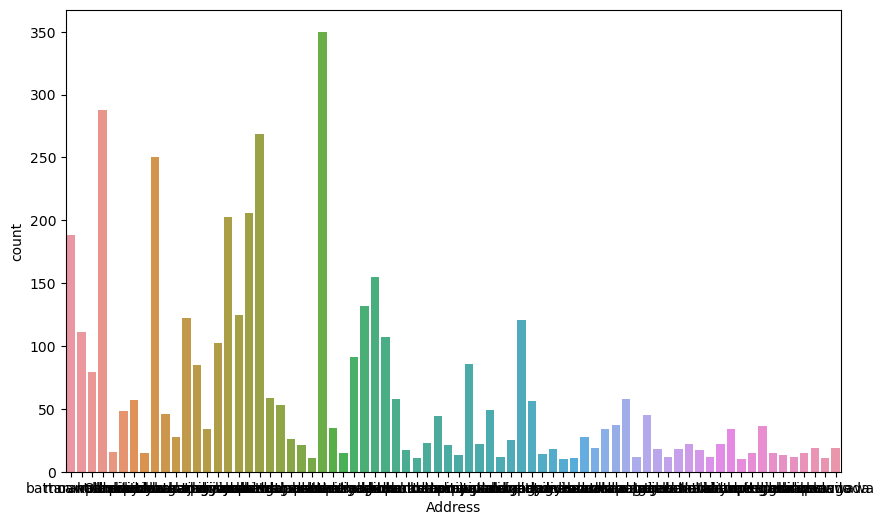

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df6, x=df6['Address'])

In [37]:
address_lessthan_75=address_count[address_count<75]

In [38]:
address_count[address_count>75]

Address
ranala            350
Other             288
makandana         269
kaduwela          250
kesbewa           206
piliyandala       203
battaramulla      188
malabe            155
nugegoda          132
madapatha         125
thalawathugoda    122
bomiriya          121
nawala            111
bope              107
dehiwala          102
kahathuduwa        91
homagama           86
athurugiriya       85
mount lavinia      79
Name: count, dtype: int64

In [39]:
def label_address(address):
    if address in address_lessthan_75:
        return 'Other'
    else:
        return address

In [40]:
df7=df6.copy()
df7['Address']=df7['Address'].apply(label_address)

In [41]:
df7.Address.value_counts()

Address
Other             1709
ranala             350
makandana          269
kaduwela           250
kesbewa            206
piliyandala        203
battaramulla       188
malabe             155
nugegoda           132
madapatha          125
thalawathugoda     122
bomiriya           121
nawala             111
bope               107
dehiwala           102
kahathuduwa         91
homagama            86
athurugiriya        85
mount lavinia       79
Name: count, dtype: int64

In [42]:
df7

,Address,Land_size(Perches),Land_type,Distance from fort,count_govtschools_A,min_dist_govtschools_a,count_govtschools_B,min_dist_govtschools_b,count_semigovtschools,min_dist_semigovtschools,...,count_Govt_Hospitals,min_dist_nearest_Pvt_Hospital,count_Pvt_Hospital,min_dist_nearest_Pvt_Med_center,count_Pvt_Med_Centers,min_dist_nearest_Supermarket,count_Supermarkets_within2km,min_dist_nearest_Fuel_station,count_Fuel_Stations_within2km,Price per Perch
0,battaramulla,12.00,"Commercial, Residential",11.349555,0,3.099786,3,0.190254,0,3.899165,...,0,2.966136,0,0.184196,2,0.275528,11,1.185148,2,3800000.0
1,nawala,22.00,"Commercial, Residential",9.160830,2,1.530830,12,0.863357,1,0.906167,...,0,0.885503,5,2.102498,0,0.229320,17,1.221396,4,6500000.0
2,mount lavinia,23.00,Residential,12.887396,0,2.727171,5,0.191582,2,0.581298,...,0,4.077519,0,1.188858,2,0.113300,20,1.052876,5,2600000.0
3,Other,16.05,"Commercial, Residential",12.597925,0,2.631805,2,1.238951,2,1.496635,...,0,4.266219,0,0.585909,1,0.315818,19,0.523224,3,3700000.0
4,Other,6.80,Residential,4.222136,3,0.838323,8,0.113577,9,0.299523,...,3,0.744991,4,1.394043,2,0.234181,17,0.836103,4,85000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4489,Other,10.00,Residential,23.746213,0,4.837966,1,1.613489,0,2.594460,...,0,6.298217,0,1.930092,1,1.136606,2,0.861553,1,750000.0
4490,Other,13.50,Residential,22.956255,0,3.976033,1,0.373851,0,3.358609,...,0,7.025906,0,7.276346,0,2.946017,0,1.661365,1,825000.0
4491,mount lavinia,10.00,Residential,12.887396,0,2.727171,5,0.191582,2,0.581298,...,0,4.077519,0,1.188858,2,0.113300,20,1.052876,5,3000000.0
4492,Other,20.00,Residential,18.783487,1,0.524910,4,0.867486,1,1.170520,...,0,1.156372,1,1.111006,1,0.664092,4,0.666650,5,2000000.0


In [43]:
df7.describe()

,Land_size(Perches),Distance from fort,count_govtschools_A,min_dist_govtschools_a,count_govtschools_B,min_dist_govtschools_b,count_semigovtschools,min_dist_semigovtschools,count_intlschools,min_dist_intlschools,...,count_Govt_Hospitals,min_dist_nearest_Pvt_Hospital,count_Pvt_Hospital,min_dist_nearest_Pvt_Med_center,count_Pvt_Med_Centers,min_dist_nearest_Supermarket,count_Supermarkets_within2km,min_dist_nearest_Fuel_station,count_Fuel_Stations_within2km,Price per Perch
count,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,...,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4.491000e+03
mean,16.042311,18.215731,0.508795,5.976378,3.044756,1.080247,0.591405,4.995953,0.533957,6.863723,...,0.253841,4.314145,0.548876,3.054971,0.705188,1.077370,7.552438,1.741383,1.667557,2.051590e+06
std,27.022765,6.843921,1.352256,5.230093,3.396120,2.166337,1.357092,3.962900,1.309004,5.744343,...,0.757240,3.607954,1.347771,3.394035,1.119942,1.657119,6.799686,2.634914,1.570515,3.343630e+06
min,1.000000,3.380004,0.000000,0.180829,0.000000,0.057183,0.000000,0.222444,0.000000,0.194329,...,0.000000,0.115703,0.000000,0.120769,0.000000,0.014519,0.000000,0.044349,0.000000,4.600000e+03
25%,7.000000,12.887396,0.000000,2.870641,1.000000,0.364496,0.000000,1.773600,0.000000,1.964620,...,0.000000,2.069621,0.000000,0.537213,0.000000,0.229320,1.000000,0.327719,1.000000,4.500000e+05
50%,9.700000,18.853887,0.000000,4.222295,2.000000,0.686802,0.000000,4.412525,0.000000,5.651113,...,0.000000,3.522925,0.000000,2.606001,0.000000,0.492621,5.000000,1.221396,1.000000,9.000000e+05
75%,15.675000,22.591086,0.000000,9.023513,3.000000,1.191396,1.000000,7.139995,1.000000,11.105654,...,0.000000,6.281081,0.000000,4.041780,1.000000,1.602959,12.000000,1.832361,2.000000,2.400000e+06
max,555.000000,42.887269,9.000000,48.188660,33.000000,44.210938,9.000000,44.425563,9.000000,50.403448,...,6.000000,45.357129,6.000000,32.569341,7.000000,27.598539,25.000000,44.438292,8.000000,8.500000e+07


In [44]:
df7[df7['count_govtschools_A']==0].shape

(3543, 31)

In [45]:
df7[df7['count_semigovtschools']==0].shape

(3268, 31)

In [46]:
df7[df7['count_Govt_Hospitals']==0.0].shape

(3700, 31)

In [47]:
df7[df7['count_Pvt_Hospital']==0.0].shape

(3436, 31)

In [48]:
df7[df7['count_Supermarkets_within2km']<=2].shape

(1560, 31)

In [49]:
df7[df7['count_Fuel_Stations_within2km']<=2].shape

(3457, 31)

In [50]:
df7[df7['count_govtschools_B']<=2].shape

(2458, 31)

In [51]:
df7[df7['min_dist_govtschools_b']<=2].shape

(3996, 31)

In [52]:
df7[df7['count_govtschools_B']<=1].shape

(1696, 31)

In [53]:
land_type=df7.Land_type.value_counts()
land_type

Land_type
Residential                                     2281
Commercial, Residential                         1097
Commercial, Residential, Other                   548
Residential, Other                               267
Commercial                                       104
Agricultural, Commercial, Residential             82
Agricultural, Commercial, Residential, Other      62
Other                                             26
Commercial, Other                                  8
Agricultural, Residential                          7
Agricultural, Residential, Other                   3
Agricultural                                       3
Agricultural, Commercial                           2
Agricultural, Commercial, Other                    1
Name: count, dtype: int64

In [54]:
land_type_greater_260=land_type[land_type>260]
land_type_greater_260

Land_type
Residential                       2281
Commercial, Residential           1097
Commercial, Residential, Other     548
Residential, Other                 267
Name: count, dtype: int64

In [55]:
def label_landType(land_type):
    if land_type in land_type_greater_260:
        return land_type
    else:
        return 'Other'
        

In [56]:
df8=df7.copy()
df8['Land_type']=df8['Land_type'].apply(label_landType)

In [57]:
df8.Land_type.value_counts()

Land_type
Residential                       2281
Commercial, Residential           1097
Commercial, Residential, Other     548
Other                              298
Residential, Other                 267
Name: count, dtype: int64

In [58]:
df8

,Address,Land_size(Perches),Land_type,Distance from fort,count_govtschools_A,min_dist_govtschools_a,count_govtschools_B,min_dist_govtschools_b,count_semigovtschools,min_dist_semigovtschools,...,count_Govt_Hospitals,min_dist_nearest_Pvt_Hospital,count_Pvt_Hospital,min_dist_nearest_Pvt_Med_center,count_Pvt_Med_Centers,min_dist_nearest_Supermarket,count_Supermarkets_within2km,min_dist_nearest_Fuel_station,count_Fuel_Stations_within2km,Price per Perch
0,battaramulla,12.00,"Commercial, Residential",11.349555,0,3.099786,3,0.190254,0,3.899165,...,0,2.966136,0,0.184196,2,0.275528,11,1.185148,2,3800000.0
1,nawala,22.00,"Commercial, Residential",9.160830,2,1.530830,12,0.863357,1,0.906167,...,0,0.885503,5,2.102498,0,0.229320,17,1.221396,4,6500000.0
2,mount lavinia,23.00,Residential,12.887396,0,2.727171,5,0.191582,2,0.581298,...,0,4.077519,0,1.188858,2,0.113300,20,1.052876,5,2600000.0
3,Other,16.05,"Commercial, Residential",12.597925,0,2.631805,2,1.238951,2,1.496635,...,0,4.266219,0,0.585909,1,0.315818,19,0.523224,3,3700000.0
4,Other,6.80,Residential,4.222136,3,0.838323,8,0.113577,9,0.299523,...,3,0.744991,4,1.394043,2,0.234181,17,0.836103,4,85000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4489,Other,10.00,Residential,23.746213,0,4.837966,1,1.613489,0,2.594460,...,0,6.298217,0,1.930092,1,1.136606,2,0.861553,1,750000.0
4490,Other,13.50,Residential,22.956255,0,3.976033,1,0.373851,0,3.358609,...,0,7.025906,0,7.276346,0,2.946017,0,1.661365,1,825000.0
4491,mount lavinia,10.00,Residential,12.887396,0,2.727171,5,0.191582,2,0.581298,...,0,4.077519,0,1.188858,2,0.113300,20,1.052876,5,3000000.0
4492,Other,20.00,Residential,18.783487,1,0.524910,4,0.867486,1,1.170520,...,0,1.156372,1,1.111006,1,0.664092,4,0.666650,5,2000000.0


In [59]:
df9=df8.drop(['count_govtschools_A','count_semigovtschools','count_Govt_Hospitals','count_Pvt_Hospital','count_Supermarkets_within2km','count_govtschools_B','count_govtschools_B'],axis='columns')

In [60]:
df9

,Address,Land_size(Perches),Land_type,Distance from fort,min_dist_govtschools_a,min_dist_govtschools_b,min_dist_semigovtschools,count_intlschools,min_dist_intlschools,count_uni,...,min_dist_nearest_FinanceCompany,count_FinanceCompanies_within_2km,min_dist_nearest_Govt_Hospital,min_dist_nearest_Pvt_Hospital,min_dist_nearest_Pvt_Med_center,count_Pvt_Med_Centers,min_dist_nearest_Supermarket,min_dist_nearest_Fuel_station,count_Fuel_Stations_within2km,Price per Perch
0,battaramulla,12.00,"Commercial, Residential",11.349555,3.099786,0.190254,3.899165,1,1.322046,0,...,0.115222,3,2.304565,2.966136,0.184196,2,0.275528,1.185148,2,3800000.0
1,nawala,22.00,"Commercial, Residential",9.160830,1.530830,0.863357,0.906167,4,1.598612,1,...,0.491287,7,2.580394,0.885503,2.102498,0,0.229320,1.221396,4,6500000.0
2,mount lavinia,23.00,Residential,12.887396,2.727171,0.191582,0.581298,0,2.842966,0,...,0.323762,5,3.907213,4.077519,1.188858,2,0.113300,1.052876,5,2600000.0
3,Other,16.05,"Commercial, Residential",12.597925,2.631805,1.238951,1.496635,0,2.434278,1,...,1.368774,4,2.883591,4.266219,0.585909,1,0.315818,0.523224,3,3700000.0
4,Other,6.80,Residential,4.222136,0.838323,0.113577,0.299523,2,1.342131,2,...,0.167803,13,1.459288,0.744991,1.394043,2,0.234181,0.836103,4,85000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4489,Other,10.00,Residential,23.746213,4.837966,1.613489,2.594460,0,11.437378,0,...,1.726170,5,2.969513,6.298217,1.930092,1,1.136606,0.861553,1,750000.0
4490,Other,13.50,Residential,22.956255,3.976033,0.373851,3.358609,0,12.923417,0,...,1.047660,1,10.012626,7.025906,7.276346,0,2.946017,1.661365,1,825000.0
4491,mount lavinia,10.00,Residential,12.887396,2.727171,0.191582,0.581298,0,2.842966,0,...,0.323762,5,3.907213,4.077519,1.188858,2,0.113300,1.052876,5,3000000.0
4492,Other,20.00,Residential,18.783487,0.524910,0.867486,1.170520,0,7.072939,1,...,0.656730,1,3.555523,1.156372,1.111006,1,0.664092,0.666650,5,2000000.0


In [63]:
df9[df9['count_intlschools']==0].shape

(3357, 25)

In [66]:
def count_zeros_in_columns(df):
    zero_counts = df.eq(0).sum()
    for column_name, zero_count in zero_counts.items():
        print(f"{column_name} - {zero_count}")        

In [67]:
count_zeros_in_columns(df9)

Address - 0
Land_size(Perches) - 0
Land_type - 0
Distance from fort - 0
min_dist_govtschools_a - 0
min_dist_govtschools_b - 0
min_dist_semigovtschools - 0
count_intlschools - 3357
min_dist_intlschools - 0
count_uni - 3266
min_dist_uni - 0
min_dist_nearest_express - 0
min_dist_nearest_railway - 0
min_dist_nearest_bank - 0
count_banks_within_2km - 474
min_dist_nearest_FinanceCompany - 0
count_FinanceCompanies_within_2km - 1819
min_dist_nearest_Govt_Hospital - 0
min_dist_nearest_Pvt_Hospital - 0
min_dist_nearest_Pvt_Med_center - 0
count_Pvt_Med_Centers - 2643
min_dist_nearest_Supermarket - 0
min_dist_nearest_Fuel_station - 0
count_Fuel_Stations_within2km - 1037
Price per Perch - 0


In [69]:
df10=df9.drop(['count_intlschools','count_uni'],axis='columns')

In [70]:
df10.shape

(4491, 23)

In [68]:
df9.shape

(4491, 25)

In [71]:
df10.describe()

,Land_size(Perches),Distance from fort,min_dist_govtschools_a,min_dist_govtschools_b,min_dist_semigovtschools,min_dist_intlschools,min_dist_uni,min_dist_nearest_express,min_dist_nearest_railway,min_dist_nearest_bank,...,min_dist_nearest_FinanceCompany,count_FinanceCompanies_within_2km,min_dist_nearest_Govt_Hospital,min_dist_nearest_Pvt_Hospital,min_dist_nearest_Pvt_Med_center,count_Pvt_Med_Centers,min_dist_nearest_Supermarket,min_dist_nearest_Fuel_station,count_Fuel_Stations_within2km,Price per Perch
count,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,...,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4491.000000,4.491000e+03
mean,16.042311,18.215731,5.976378,1.080247,4.995953,6.863723,3.540490,6.226962,4.121218,0.968780,...,1.885881,2.573592,4.448520,4.314145,3.054971,0.705188,1.077370,1.741383,1.667557,2.051590e+06
std,27.022765,6.843921,5.230093,2.166337,3.962900,5.744343,2.897645,3.946100,3.217244,2.094070,...,2.655791,3.164898,3.356558,3.607954,3.394035,1.119942,1.657119,2.634914,1.570515,3.343630e+06
min,1.000000,3.380004,0.180829,0.057183,0.222444,0.194329,0.091650,0.409507,0.019539,0.008397,...,0.006866,0.000000,0.195794,0.115703,0.120769,0.000000,0.014519,0.044349,0.000000,4.600000e+03
25%,7.000000,12.887396,2.870641,0.364496,1.773600,1.964620,1.573693,3.667243,1.126815,0.069620,...,0.256501,0.000000,2.304565,2.069621,0.537213,0.000000,0.229320,0.327719,1.000000,4.500000e+05
50%,9.700000,18.853887,4.222295,0.686802,4.412525,5.651113,3.232579,5.842113,3.876447,0.319051,...,0.880596,2.000000,3.638195,3.522925,2.606001,0.000000,0.492621,1.221396,1.000000,9.000000e+05
75%,15.675000,22.591086,9.023513,1.191396,7.139995,11.105654,4.731446,7.480200,6.739825,1.798093,...,3.169234,4.000000,4.964895,6.281081,4.041780,1.000000,1.602959,1.832361,2.000000,2.400000e+06
max,555.000000,42.887269,48.188660,44.210938,44.425563,50.403448,44.090417,25.983992,29.986502,41.000063,...,44.747104,20.000000,37.950091,45.357129,32.569341,7.000000,27.598539,44.438292,8.000000,8.500000e+07


In [72]:
df10.isnull().sum()

Address                              0
Land_size(Perches)                   0
Land_type                            0
Distance from fort                   0
min_dist_govtschools_a               0
min_dist_govtschools_b               0
min_dist_semigovtschools             0
min_dist_intlschools                 0
min_dist_uni                         0
min_dist_nearest_express             0
min_dist_nearest_railway             0
min_dist_nearest_bank                0
count_banks_within_2km               0
min_dist_nearest_FinanceCompany      0
count_FinanceCompanies_within_2km    0
min_dist_nearest_Govt_Hospital       0
min_dist_nearest_Pvt_Hospital        0
min_dist_nearest_Pvt_Med_center      0
count_Pvt_Med_Centers                0
min_dist_nearest_Supermarket         0
min_dist_nearest_Fuel_station        0
count_Fuel_Stations_within2km        0
Price per Perch                      0
dtype: int64

In [124]:
df10['Land_size(Perches)'].mean()+(3*df10['Land_size(Perches)'].std())

97.11060500831267

In [125]:
df10[df10['Land_size(Perches)']>df10['Land_size(Perches)'].mean()+(3*df10['Land_size(Perches)'].std())]

,Address,Land_size(Perches),Land_type,Distance from fort,min_dist_govtschools_a,min_dist_govtschools_b,min_dist_semigovtschools,min_dist_intlschools,min_dist_uni,min_dist_nearest_express,...,min_dist_nearest_FinanceCompany,count_FinanceCompanies_within_2km,min_dist_nearest_Govt_Hospital,min_dist_nearest_Pvt_Hospital,min_dist_nearest_Pvt_Med_center,count_Pvt_Med_Centers,min_dist_nearest_Supermarket,min_dist_nearest_Fuel_station,count_Fuel_Stations_within2km,Price per Perch
73,Other,212.84,Other,4.649502,0.394260,0.267626,0.359031,2.051190,1.310970,3.666523,...,0.338493,16,0.863655,0.671894,0.170909,6,0.127508,0.527305,8,17000000.0
86,Other,100.00,"Commercial, Residential",31.505247,14.139784,0.620646,5.895724,16.788495,1.381423,12.167284,...,0.481993,1,11.281286,0.122666,7.015857,0,0.395559,6.762906,0,480000.0
154,Other,180.00,"Commercial, Residential, Other",32.724040,18.383726,2.962546,10.792815,17.428507,5.980389,15.532022,...,3.879452,0,11.480011,7.282954,11.239443,0,3.205860,3.378774,0,115000.0
228,mount lavinia,100.00,Other,12.887396,2.727171,0.191582,0.581298,2.842966,2.847591,12.642444,...,0.323762,5,3.907213,4.077519,1.188858,2,0.113300,1.052876,5,40000.0
264,mount lavinia,409.00,"Commercial, Residential",12.887396,2.727171,0.191582,0.581298,2.842966,2.847591,12.642444,...,0.323762,5,3.907213,4.077519,1.188858,2,0.113300,1.052876,5,2500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4180,thalawathugoda,145.00,"Commercial, Residential, Other",14.191984,3.947032,1.741785,3.685223,2.039184,4.333994,4.620078,...,0.311696,1,4.725444,0.346662,2.606001,0,0.207307,1.832361,1,4500000.0
4255,piliyandala,100.00,Other,18.853887,3.819413,0.364496,4.687851,8.734721,2.757533,6.672114,...,0.101707,4,3.948001,0.115703,0.338692,1,0.492621,0.048598,2,57000.0
4263,Other,202.00,Other,32.724040,18.383726,2.962546,10.792815,17.428507,5.980389,15.532022,...,3.879452,0,11.480011,7.282954,11.239443,0,3.205860,3.378774,0,110000.0
4292,Other,110.00,Other,19.716454,9.373586,0.751005,8.045633,4.416684,3.346328,2.596716,...,2.594123,0,6.762836,8.497998,3.181837,0,2.126975,2.345782,0,800000.0


In [127]:
df10[df10['Land_size(Perches)']<df10['Land_size(Perches)'].mean()-(3*df10['Land_size(Perches)'].std())].shape

(0, 23)

In [128]:
df10[df10['Land_size(Perches)']>df10['Land_size(Perches)'].mean()+(3*df10['Land_size(Perches)'].std())].shape

(63, 23)

In [129]:
df11=df10[df10['Land_size(Perches)']<df10['Land_size(Perches)'].mean()+(3*df10['Land_size(Perches)'].std())]

In [130]:
df10.shape

(4491, 23)

In [131]:
df11.shape

(4428, 23)

In [132]:
df11[df11['Price per Perch']>df11['Price per Perch'].mean()+(3*df11['Price per Perch'].std())]

,Address,Land_size(Perches),Land_type,Distance from fort,min_dist_govtschools_a,min_dist_govtschools_b,min_dist_semigovtschools,min_dist_intlschools,min_dist_uni,min_dist_nearest_express,...,min_dist_nearest_FinanceCompany,count_FinanceCompanies_within_2km,min_dist_nearest_Govt_Hospital,min_dist_nearest_Pvt_Hospital,min_dist_nearest_Pvt_Med_center,count_Pvt_Med_Centers,min_dist_nearest_Supermarket,min_dist_nearest_Fuel_station,count_Fuel_Stations_within2km,Price per Perch
4,Other,6.80,Residential,4.222136,0.838323,0.113577,0.299523,1.342131,1.467278,5.676327,...,0.167803,13,1.459288,0.744991,1.394043,2,0.234181,0.836103,4,85000000.0
74,Other,13.80,"Commercial, Residential, Other",5.424491,0.338838,0.584007,0.547722,0.401010,0.274439,6.485149,...,0.279053,8,1.939211,0.364487,1.056826,3,0.248493,0.813137,5,13000000.0
79,Other,38.00,"Commercial, Residential, Other",5.792747,0.746903,0.923001,0.398041,0.409683,0.246502,5.260461,...,0.804790,20,0.909982,1.241118,0.547188,6,0.270995,0.262818,7,20000000.0
245,Other,29.00,Residential,5.792747,0.746903,0.923001,0.398041,0.409683,0.246502,5.260461,...,0.804790,20,0.909982,1.241118,0.547188,6,0.270995,0.262818,7,18000000.0
292,Other,8.25,Other,14.286070,4.176486,0.686358,1.733970,4.301485,2.210242,12.719849,...,0.515813,5,5.333817,5.530317,0.322179,1,0.450048,0.475998,3,18250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4313,Other,18.00,"Commercial, Residential",7.570550,0.180829,0.283602,0.307009,0.194329,0.194329,7.759565,...,0.949675,10,2.281729,0.986541,0.516100,4,0.118454,0.085681,5,14500000.0
4344,Other,10.00,Residential,16.392644,4.673446,0.386004,4.412525,3.890750,3.876605,1.871289,...,2.288962,0,4.937735,2.968547,4.563302,0,1.187704,0.074059,1,18500000.0
4346,Other,9.00,Residential,5.424491,0.338838,0.584007,0.547722,0.401010,0.274439,6.485149,...,0.279053,8,1.939211,0.364487,1.056826,3,0.248493,0.813137,5,13000000.0
4349,Other,8.35,Other,8.428288,0.939434,0.601618,0.555210,0.529896,0.683795,8.270892,...,0.107440,11,1.478614,1.066323,1.082209,3,0.220060,0.776472,5,19000000.0


In [133]:
df11[df11['Price per Perch']<df11['Price per Perch'].mean()-(3*df11['Price per Perch'].std())]

,Address,Land_size(Perches),Land_type,Distance from fort,min_dist_govtschools_a,min_dist_govtschools_b,min_dist_semigovtschools,min_dist_intlschools,min_dist_uni,min_dist_nearest_express,...,min_dist_nearest_FinanceCompany,count_FinanceCompanies_within_2km,min_dist_nearest_Govt_Hospital,min_dist_nearest_Pvt_Hospital,min_dist_nearest_Pvt_Med_center,count_Pvt_Med_Centers,min_dist_nearest_Supermarket,min_dist_nearest_Fuel_station,count_Fuel_Stations_within2km,Price per Perch


In [134]:
df11[df11['Price per Perch']>df11['Price per Perch'].mean()+(3*df11['Price per Perch'].std())].shape

(109, 23)

In [135]:
df12=df11[df11['Price per Perch']<df11['Price per Perch'].mean()+(3*df11['Price per Perch'].std())]

In [136]:
df11.shape

(4428, 23)

In [137]:
df12.shape

(4319, 23)

In [142]:
dummies=pd.get_dummies(df12.Address)

In [143]:
df13=pd.concat([df12,dummies],axis='columns')

In [144]:
df13

,Address,Land_size(Perches),Land_type,Distance from fort,min_dist_govtschools_a,min_dist_govtschools_b,min_dist_semigovtschools,min_dist_intlschools,min_dist_uni,min_dist_nearest_express,...,kesbewa,madapatha,makandana,malabe,mount lavinia,nawala,nugegoda,piliyandala,ranala,thalawathugoda
0,battaramulla,12.00,"Commercial, Residential",11.349555,3.099786,0.190254,3.899165,1.322046,3.232579,6.632046,...,False,False,False,False,False,False,False,False,False,False
1,nawala,22.00,"Commercial, Residential",9.160830,1.530830,0.863357,0.906167,1.598612,0.668116,7.480200,...,False,False,False,False,False,True,False,False,False,False
2,mount lavinia,23.00,Residential,12.887396,2.727171,0.191582,0.581298,2.842966,2.847591,12.642444,...,False,False,False,False,True,False,False,False,False,False
3,Other,16.05,"Commercial, Residential",12.597925,2.631805,1.238951,1.496635,2.434278,0.986116,9.697738,...,False,False,False,False,False,False,False,False,False,False
5,nawala,22.00,"Commercial, Residential",9.160830,1.530830,0.863357,0.906167,1.598612,0.668116,7.480200,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4489,Other,10.00,Residential,23.746213,4.837966,1.613489,2.594460,11.437378,3.351104,3.084369,...,False,False,False,False,False,False,False,False,False,False
4490,Other,13.50,Residential,22.956255,3.976033,0.373851,3.358609,12.923417,5.591785,10.698569,...,False,False,False,False,False,False,False,False,False,False
4491,mount lavinia,10.00,Residential,12.887396,2.727171,0.191582,0.581298,2.842966,2.847591,12.642444,...,False,False,False,False,True,False,False,False,False,False
4492,Other,20.00,Residential,18.783487,0.524910,0.867486,1.170520,7.072939,1.580041,2.497388,...,False,False,False,False,False,False,False,False,False,False


In [145]:
df13.columns

Index(['Address', 'Land_size(Perches)', 'Land_type', 'Distance from fort',
       'min_dist_govtschools_a', 'min_dist_govtschools_b',
       'min_dist_semigovtschools', 'min_dist_intlschools', 'min_dist_uni',
       'min_dist_nearest_express', 'min_dist_nearest_railway',
       'min_dist_nearest_bank', 'count_banks_within_2km',
       'min_dist_nearest_FinanceCompany', 'count_FinanceCompanies_within_2km',
       'min_dist_nearest_Govt_Hospital', 'min_dist_nearest_Pvt_Hospital',
       'min_dist_nearest_Pvt_Med_center', 'count_Pvt_Med_Centers',
       'min_dist_nearest_Supermarket', 'min_dist_nearest_Fuel_station',
       'count_Fuel_Stations_within2km', 'Price per Perch', 'Other',
       'athurugiriya', 'battaramulla', 'bomiriya', 'bope', 'dehiwala',
       'homagama', 'kaduwela', 'kahathuduwa', 'kesbewa', 'madapatha',
       'makandana', 'malabe', 'mount lavinia', 'nawala', 'nugegoda',
       'piliyandala', 'ranala', 'thalawathugoda'],
      dtype='object')

In [146]:
df14=df13.drop(['Address','Other'],axis='columns')

In [147]:
df14['Land_type'].unique()

array(['Commercial, Residential', 'Residential',
       'Commercial, Residential, Other', 'Other', 'Residential, Other'],
      dtype=object)

In [148]:
mapping={
    'Commercial, Residential':1,
    'Residential':2,
    'Commercial, Residential, Other':3, 
    'Residential, Other':4,
    'Other':5, 
}

In [149]:
df15=df14.copy()
df15['Land_type']=df15['Land_type'].map(mapping)

In [150]:
df15

,Land_size(Perches),Land_type,Distance from fort,min_dist_govtschools_a,min_dist_govtschools_b,min_dist_semigovtschools,min_dist_intlschools,min_dist_uni,min_dist_nearest_express,min_dist_nearest_railway,...,kesbewa,madapatha,makandana,malabe,mount lavinia,nawala,nugegoda,piliyandala,ranala,thalawathugoda
0,12.00,1,11.349555,3.099786,0.190254,3.899165,1.322046,3.232579,6.632046,4.072472,...,False,False,False,False,False,False,False,False,False,False
1,22.00,1,9.160830,1.530830,0.863357,0.906167,1.598612,0.668116,7.480200,0.647482,...,False,False,False,False,False,True,False,False,False,False
2,23.00,2,12.887396,2.727171,0.191582,0.581298,2.842966,2.847591,12.642444,0.528389,...,False,False,False,False,True,False,False,False,False,False
3,16.05,1,12.597925,2.631805,1.238951,1.496635,2.434278,0.986116,9.697738,1.970515,...,False,False,False,False,False,False,False,False,False,False
5,22.00,1,9.160830,1.530830,0.863357,0.906167,1.598612,0.668116,7.480200,0.647482,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4489,10.00,2,23.746213,4.837966,1.613489,2.594460,11.437378,3.351104,3.084369,2.215014,...,False,False,False,False,False,False,False,False,False,False
4490,13.50,2,22.956255,3.976033,0.373851,3.358609,12.923417,5.591785,10.698569,0.239088,...,False,False,False,False,False,False,False,False,False,False
4491,10.00,2,12.887396,2.727171,0.191582,0.581298,2.842966,2.847591,12.642444,0.528389,...,False,False,False,False,True,False,False,False,False,False
4492,20.00,2,18.783487,0.524910,0.867486,1.170520,7.072939,1.580041,2.497388,1.230063,...,False,False,False,False,False,False,False,False,False,False


In [151]:
df15.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4319 entries, 0 to 4493
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Land_size(Perches)                 4319 non-null   float64
 1   Land_type                          4319 non-null   int64  
 2   Distance from fort                 4319 non-null   float64
 3   min_dist_govtschools_a             4319 non-null   float64
 4   min_dist_govtschools_b             4319 non-null   float64
 5   min_dist_semigovtschools           4319 non-null   float64
 6   min_dist_intlschools               4319 non-null   float64
 7   min_dist_uni                       4319 non-null   float64
 8   min_dist_nearest_express           4319 non-null   float64
 9   min_dist_nearest_railway           4319 non-null   float64
 10  min_dist_nearest_bank              4319 non-null   float64
 11  count_banks_within_2km             4319 non-null   int64  
 1

In [152]:
x=df15.drop(['Price per Perch'],axis='columns')

In [153]:
y=df15['Price per Perch'] 

In [154]:
y

0       3800000.0
1       6500000.0
2       2600000.0
3       3700000.0
5       6500000.0
          ...    
4489     750000.0
4490     825000.0
4491    3000000.0
4492    2000000.0
4493     395000.0
Name: Price per Perch, Length: 4319, dtype: float64

In [155]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [156]:
X_train.shape

(3455, 39)

In [157]:
X_test.shape

(864, 39)

In [158]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [159]:
model.fit(X_train,y_train)

LinearRegression()

In [160]:
model.score(X_test,y_test)

0.726755533847635